In [4]:
%cd drive/MyDrive/DataMining/hw3

/content/drive/MyDrive/DataMining/hw3


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeavePOut
from collections import Counter
from sklearn.metrics import confusion_matrix
import seaborn as sns

<div dir="rtl">

a)
در قسمت اول ابتدا مجموعه داده خوانده شده ویژگی های ورودی مدل در متغیر X و ویژگی هدف در متغیر y قرار داده شده است. 

</div>

In [5]:
df = pd.read_csv('Iris.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Class,Petal length,Sepal length,Sepal width,Petal width
0,1,51,35,14,2
1,1,49,30,14,2
2,1,47,32,13,2
3,1,46,31,15,2
4,1,50,36,14,2


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

<div dir="rtl">

در قسمت بعد الگوریتم knn پیاده سازی شده است. برای این کار از چهار تابع استفاده شده است.
<br>
در تابع distance_ecu فاصله ی اقلیدسی بین هریک از نمونه های ورودی x_train و نمونه ی موجود در ورودی x_test_point محاسبه میشود و در یک دیتافریم بازگردانده میشود.

<div>

In [8]:
def distance_ecu(x_train, x_test_point):
    distances= [] 
    for row in range(len(x_train)): 
        current_train_point= x_train[row] 
        current_distance= 0 

        for col in range(len(current_train_point)): 
            current_distance += (current_train_point[col] - x_test_point[col]) **2
            
        current_distance= np.sqrt(current_distance)

        distances.append(current_distance)


    distances= pd.DataFrame(data=distances,columns=['dist'])
    return distances

<div dir="rtl">

در تابع nearest_neighbors تعداد k تا از نزدیک ترین فاصله ها (که توسط تابع قبلی محاسبه شد) بازگردانده میشوند. 

<div>

In [9]:
def nearest_neighbors(distance_point, K):
    df_nearest= distance_point.sort_values(by=['dist'], axis=0)

    df_nearest= df_nearest[:K]
    return df_nearest

<div dir="rtl">

در تابع voting با توجه به برچسب k همسایه ی نزدیک برچسب داده ی تست با روش maximum voting مشخص میشود. 

<div>

In [10]:
def voting(df_nearest, y_train):
    counter_vote= Counter(y_train[list(df_nearest.index)])

    y_pred= counter_vote.most_common()[0][0]

    return y_pred

<div dir="rtl">

در تابع KNN_from_scratch توابع قبلی برای هر داده ی تست به ترتیب فراخوانده میشوند و برچسب به دست آمده بازگردانده میشود. علاوه براین در ابتدای تابع عمل نرمال سازی روی داده ی آموزشی انجام میشود. 

<div>

In [11]:
def KNN_from_scratch(x_train, y_train, x_test, K):
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    
    y_pred=[]

    for x_test_point in x_test:
        distance_point  = distance_ecu(x_train, x_test_point)
        df_nearest_point= nearest_neighbors(distance_point, K)
        y_pred_point    = voting(df_nearest_point, y_train)
        y_pred.append(y_pred_point)

    return np.array(y_pred)  


<div dir="rtl">

در این قسمت با استفاده از روش Leave One Out داده ی آموزش و تست جداشده اند و به ازای k از 1 تا 50 عمل classification به روش knn انجام شده است. علاوه بر این به ازای هر k نرخ خطا به کمک confusion matrix محاسبه شده است.

<div>

In [12]:
lpo = LeavePOut(p=1)
error = []
for k in range(1, 51):
    y_true = []
    y_pred = []
    for train_index, test_index in lpo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        y_p = KNN_from_scratch(X_train, y_train, X_test, k)
        y_true.append(y_test[0])
        y_pred.append(y_p[0])
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    cm = confusion_matrix(y_true, y_pred)
    error.append(1 - (cm[0, 0] + cm[1, 1] + cm[2, 2])/150)

<div dir="rtl">

در این قسمت نرخ خطای به دست آمده در قسمت قبل رسم شده است.
<br>
همان طور که مشخص است به طور کلی در ابتدا با افزایش k خطا کاهش یافته است. سپس به ازای چندین مقدار k خطا ثابت مانده است و پس از آن با افزایش مقدار k خطا افزایش پیدا کرده است.
<br>
کمترین نرخ خطا مربوط به k بین 12 تا 17 است و میزان آن برابر با 0.033 است.

<div>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


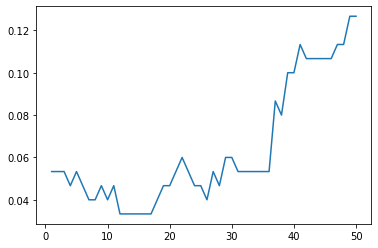

In [13]:
x = list(range(1, len(error)+1))
sns.lineplot(x, error)

In [14]:
y_true = []
y_pred = []
for train_index, test_index in lpo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_p = KNN_from_scratch(X_train, y_train, X_test, 15)
    y_true.append(y_test[0])
    y_pred.append(y_p[0])
y_true = np.array(y_true)
y_pred = np.array(y_pred)
cm = confusion_matrix(y_true, y_pred)
error  = 1 - (cm[0, 0] + cm[1, 1] + cm[2, 2])/150
error

0.033333333333333326

<div dir="rtl">

c)
در این قسمت همه ی مراحل قبل با روش weighted_voting تکرار شده است. برای این کار تابع weighted_voting نوشته شده است که با استفاده از معکوس فاصله به عنوان وزن عمل voting را انجام میدهد.
<br>
نمودار رسم شده نشان میدهد که تا حدود k برابر با 25 روند تغییر نرخ خطا مانند روش قبل است. اما از آن جا به بعد روند افزایشی متوقت میشود و پس از ثابت ماندن نرخ خطا در چندین مقدار k، مجددا روند کاهشی شروع میشود. البته در انتها نرخ خطا روند به افزایشی به خود میگیرد.
<br>
ماکزیمم نرخ خطا در روش اول از روش دوم بیشتر است.
<br>
کمترین نرخ خطا مربوط به k در بازه ی 8 تا 18 است که مقدار آن برابر با 0.033 است.

<div>

In [15]:
def weighted_voting(df_nearest, y_train):
    labels = y_train[list(df_nearest.index)]
    weights = 1/df_nearest
    
    l = list(zip(weights.loc[:, 'dist'], labels))
    a = dict()
    for dist, lbl in l:
        if lbl in a.keys():
            a[lbl] += dist
        else:
            a[lbl] = dist

    y_pred= max(a, key=a.get)

    return y_pred

In [16]:
def weighted_KNN_from_scratch(x_train, y_train, x_test, K):
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    
    y_pred=[]

    for x_test_point in x_test:
        distance_point  = distance_ecu(x_train, x_test_point)
        df_nearest_point= nearest_neighbors(distance_point, K)
        y_pred_point    = weighted_voting(df_nearest_point, y_train)
        y_pred.append(y_pred_point)

    return np.array(y_pred)  

In [17]:
lpo = LeavePOut(p=1)
error = []
for k in range(1, 51):
    y_true = []
    y_pred = []
    for train_index, test_index in lpo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        y_p = weighted_KNN_from_scratch(X_train, y_train, X_test, k)
        y_true.append(y_test[0])
        y_pred.append(y_p[0])
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    cm = confusion_matrix(y_true, y_pred)
    error.append(1 - (cm[0, 0] + cm[1, 1] + cm[2, 2])/150)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


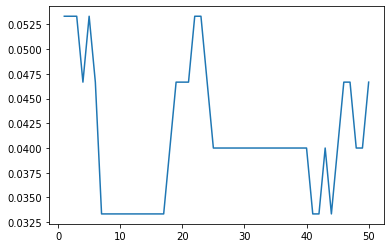

In [18]:
x = list(range(1, len(error)+1))
sns.lineplot(x, error)

In [19]:
y_true = []
y_pred = []
for train_index, test_index in lpo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_p = weighted_KNN_from_scratch(X_train, y_train, X_test, 15)
    y_true.append(y_test[0])
    y_pred.append(y_p[0])
y_true = np.array(y_true)
y_pred = np.array(y_pred)
cm = confusion_matrix(y_true, y_pred)
error = 1 - (cm[0, 0] + cm[1, 1] + cm[2, 2])/150
error

0.033333333333333326